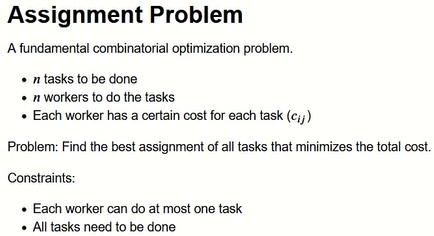

In [43]:
from IPython.display import Image
display(Image(filename='4_Assignment.jpg'))

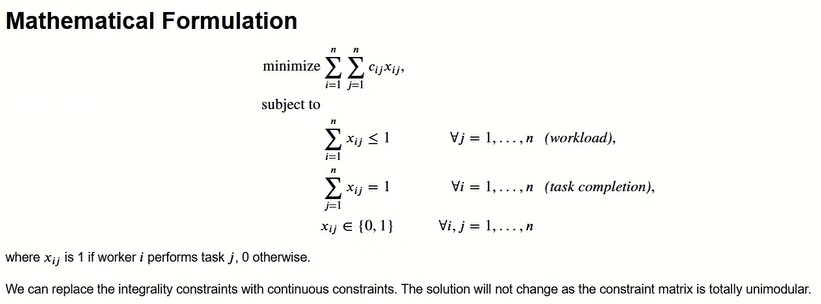

In [44]:
display(Image(filename='4_Assignment_Formu.jpg'))

In [45]:
import numpy as np
from gurobipy import Model, GRB

In [46]:
cost = np.random.randint(1, 10, (4, 4))

In [47]:
assignment_model = Model('Assignment')

Creating Decision Variables

In [48]:
x = assignment_model.addVars(cost.shape[0], cost.shape[1], vtype = GRB.BINARY, name='x')

Creating Constraints

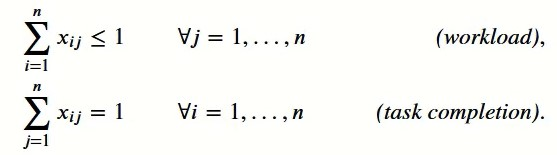

In [49]:
display(Image(filename='4_Assignment_Formu_2.jpg'))

In [50]:
# sum(i=1)^(n) x(ij) <= 1 for all j
assignment_model.addConstrs((sum(x[i, j] for i in range(cost.shape[0])) <= 1 for j in range(cost.shape[1])), name = 'work_load')

# sum(j=1)^(n) x(ij) <= 1 for all i
assignment_model.addConstrs((sum(x[i, j] for j in range(cost.shape[0])) == 1 for i in range(cost.shape[0])), name = 'task_completion')

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>}

Defining Objective Function

In [51]:
obj_fn = sum(cost[i, j]*x[i, j] for i in range(cost.shape[0]) for j in range(cost.shape[1]))
assignment_model.setObjective(obj_fn, GRB.MINIMIZE)

In [55]:
assignment_model.setParam('OutputFlag', False)
assignment_model.optimize()

# print('Model Statistics')
# assignment_model.printStats()
# print('\n\nModel Output\n')
# print(assignment_model.display())

In [54]:
print('Optimization is done. Objective Function Value: %.2f' % assignment_model.objVal)

# Print the values of decision variables
for v in assignment_model.getVars():
    if v.x > 0:
        print('%s: %g'% (v.VarName, v.x))

Optimization is done. Objective Function Value: 11.00
x[0,2]: 1
x[1,3]: 1
x[2,0]: 1
x[3,1]: 1
